# World Happiness Report 

The World Happiness Report is a landmark survey of the state of global happiness. 
The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions.
So in this project, we are going to analyse how the factors impact the happiness score, and how they are related.

In [260]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

In [261]:
#Loading the data using pandas read_csv method to create a dataframe

h_data = pd.read_csv('happiness_score.csv')

# Starting with the EDA

In [262]:
#Understanding the data by checking a data overview

h_data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [263]:
h_data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


The data seems to be having no outliers. There are no extreme values observed in the above data

The data is sorted as per Happiness Score and is randomly distributed amongst the factors responsible to decide the Happiness score

In [264]:
#Printing a part of data to analyse the values once

h_data.sample(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
86,Serbia,Central and Eastern Europe,87,5.123,0.04864,0.92053,1.00964,0.74836,0.20107,0.02617,0.19231,2.02500
148,Chad,Sub-Saharan Africa,149,3.667,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296
79,Azerbaijan,Central and Eastern Europe,80,5.212,0.03363,1.02389,0.93793,0.64045,0.37030,0.16065,0.07799,2.00073
55,Lithuania,Central and Eastern Europe,56,5.833,0.03843,1.14723,1.25745,0.73128,0.21342,0.01031,0.02641,2.44649
67,Algeria,Middle East and Northern Africa,68,5.605,0.05099,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822,2.43209
17,Ireland,Western Europe,18,6.940,0.03676,1.33596,1.36948,0.89533,0.61777,0.28703,0.45901,1.97570
64,Jamaica,Latin America and Caribbean,65,5.709,0.13693,0.81038,1.15102,0.68741,0.50442,0.02299,0.21230,2.32038
62,Libya,Middle East and Northern Africa,63,5.754,0.07832,1.13145,1.11862,0.70380,0.41668,0.11023,0.18295,2.09066
117,Sudan,Sub-Saharan Africa,118,4.550,0.06740,0.52107,1.01404,0.36878,0.10081,0.14660,0.19062,2.20857


In [265]:
#Check out for NaN values in the data

h_data.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [266]:
#Dropping 'Happiness Rank', 'Country' as they do not contribute to calculations, since all values are unique and nothing in common

h_data.drop(['Happiness Rank', 'Country'], inplace = True, axis = 1)

We identify that the data does not have NaN values.

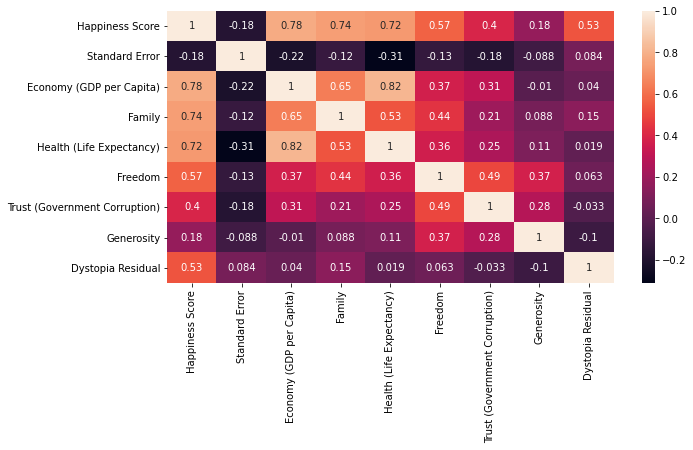

In [267]:
correlation = h_data.corr()
plt.figure(figsize=(10,5))
sns.heatmap(correlation, annot = True)
plt.show()

From the above heatmap, we see that majority of the fields that signify values (Economy, Family, Health, Freedom, Trust, Generosity and Residual) are positively correlated with Happiness Score, whereas Standard error is negatively correlated.

Economy seems to be the most correlated field.
Economy, Family and Health are highly correlated, Trust, Freedom and Dystopia residual are mildly correlated, Generosity is less correlated and is positive, and Standard error is negatively correlated with a negative correlation value.

Dystopia Residual is increasing as we increase the Happiness Score, hence keeping this value for now.

([<matplotlib.patches.Wedge at 0x1b53d2b3d60>,
 [Text(0.7574676144509213, 0.7976483016079398, 'Economy (GDP per Capita)'),
  Text(-0.9267009916025136, 0.5926426175722753, 'Family'),
  Text(-0.6077394388641231, -0.9168711874898899, 'Health (Life Expectancy)'),
  Text(0.4583996044047703, -0.9999348992217195, 'Freedom'),
  Text(0.9124914263316435, -0.6142958545125005, 'Trust (Government Corruption)'),
  Text(1.071655119618873, -0.24810341512091083, 'Generosity')])

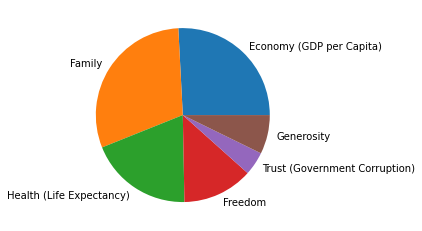

In [268]:
#  Lets now evaluate Happiness score in relation to individual factors contributing to generate it. chart

factors = ['Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom', 'Trust (Government Corruption)', 'Generosity']
plt.pie(h_data[factors].mean(), labels = factors)

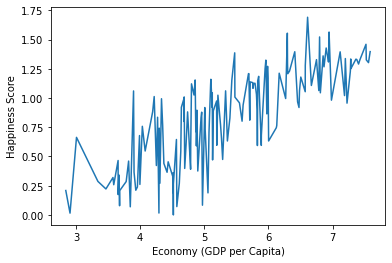

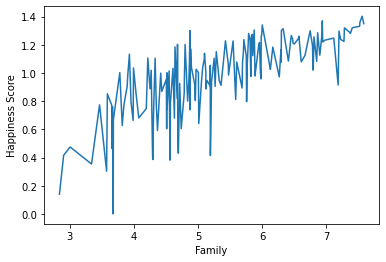

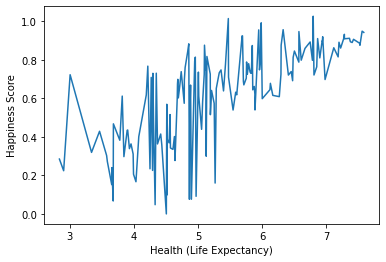

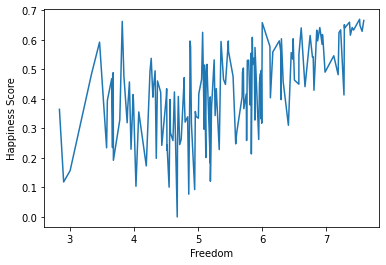

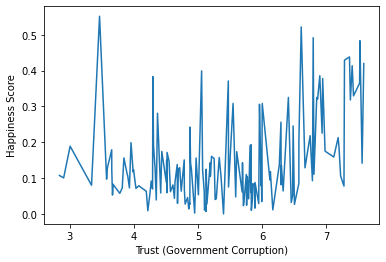

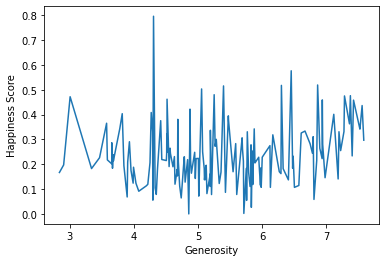

In [269]:
# Lets check the distribution of all the indicators 

for i in factors:
    plt.subplot()
    plt.xlabel(i)
    plt.ylabel('Happiness Score')
    plt.plot(h_data['Happiness Score'], h_data[i])
    plt.show()

From the above data we conclude that Family data has the least fluctuations as the Happiness score increases. 

Generosity has a low slope and is least affecting the happiness score.

In [270]:
#Checking region wise distributions once to confirm impact on happiness score

h_data['Region'].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
Australia and New Zealand           2
North America                       2
Name: Region, dtype: int64

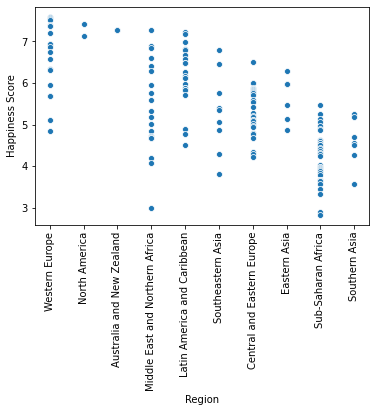

In [271]:
sns.scatterplot(h_data['Region'], h_data['Happiness Score'])
plt.xticks(rotation = 90)
plt.show()

From above data, we see that Western Europe has the happiest scores, and Southern Asia has the lowest.

Australia and New zealand have a common score, North America has the high scores for both the countries.

# Deploying ML model

In [272]:
#Encoding the region column

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [273]:
h_data['Region'] = le.fit_transform(h_data['Region'])

In [274]:
#Importing LinearRegression model to fit

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score


In [275]:
lr = LinearRegression()

In [276]:
#Dividing dependent and independent data

x = h_data.drop(['Happiness Score'], axis = 1)
y = h_data['Happiness Score']

In [277]:
#Splitting into train and test data

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 42)

In [278]:
#Fitting the model

lr.fit(x_train, y_train)

LinearRegression()

In [279]:
#Prediction

pred = lr.predict(x_test)
r2_score(y_test, pred)

0.9999999392502191

In [280]:
mean_squared_error(y_test,pred)

8.08691919310741e-08

In [281]:
mean_absolute_error(y_test, pred)

0.0002410710586128554

In [282]:
from sklearn.model_selection import cross_val_score

In [283]:
#Checking for model overfitting


cvs = cross_val_score(lr, x ,y ,cv=8, scoring='r2')
print('Cross val score for ',cvs)


Cross val score for  [0.99999853 0.9999988  0.99999359 0.9999975  0.99999105 0.99998878
 0.99999688 0.99999918]


In [284]:
cvs.mean()

0.9999955395439398

Model does not seem to be overfitting here.

Lets save the model as an object.

In [285]:
import joblib

In [286]:
joblib.dump(lr, 'happy.obj')

['happy.obj']

In [287]:
try_happy = joblib.load('happy.obj')

In [288]:
prediction = try_happy.predict(x_test)

In [289]:
r2_score(y_test, prediction)

0.9999999392502191

In [290]:
mean_absolute_error(y_test, prediction)

0.0002410710586128554

In [291]:
#We are done here.